In [43]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif, RFE
import matplotlib.pyplot as plt


In [44]:
# Load the dataset
df = pd.read_csv('dataset/parkinsons.data')
if 'name' in df.columns:
    df = df.drop('name', axis=1)
display(df.head())
df.info()
print('\nMissing values per column:')
print(df.isnull().sum())

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  status            195 non-null    int64  
 1

In [45]:
# Encode categorical variables (if any remain)
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
if 'status' in cat_cols and pd.api.types.is_numeric_dtype(df['status']):
    cat_cols.remove('status')
if cat_cols:
    df = pd.get_dummies(df, columns=cat_cols, drop_first=True)
print('Shape after encoding:', df.shape)
print('Data types after encoding:')
print(df.dtypes)

Shape after encoding: (195, 23)
Data types after encoding:
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object


In [46]:
# Scale numerical features (excluding the target 'status')
features = df.drop('status', axis=1)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
df_scaled = pd.DataFrame(features_scaled, columns=features.columns)
df_scaled['status'] = df['status'].values
print('Scaled features shape:', df_scaled.shape)
display(df_scaled.head())

Scaled features shape: (195, 23)


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,-0.829300,-0.436165,-0.952037,0.334914,0.749759,0.132963,0.760800,0.131755,0.745985,0.739536,...,0.607532,-0.067893,-0.193225,-0.807838,1.760814,0.801323,0.480477,-0.210531,0.868886,1
1,-0.770972,-0.530974,-0.057721,0.715418,1.037674,0.453892,1.276809,0.452684,1.681731,1.768464,...,1.548254,-0.137843,-0.634508,-0.387524,1.837562,1.479853,1.311185,0.275077,1.803605,1
2,-0.909476,-0.723168,-0.109875,0.884991,1.325589,0.720770,1.585687,0.721813,1.202693,1.027636,...,1.175323,-0.291633,-0.279760,-0.662075,1.942048,1.141445,1.017682,-0.103629,1.402661,1
3,-0.909622,-0.649092,-0.114229,0.775389,1.325589,0.578885,1.284076,0.577677,1.340396,1.207698,...,1.340229,-0.280719,-0.281346,-0.613134,1.832380,1.440945,1.293840,0.062145,1.806954,1
4,-0.925657,-0.606245,-0.130608,1.368893,1.901418,1.095750,2.047187,1.096793,1.836448,1.552389,...,1.899461,-0.178026,-0.506745,-0.783021,1.909364,1.780940,0.096195,-0.130026,2.267082,1


In [47]:
# Split into train/test sets (80/20)
X = df_scaled.drop('status', axis=1)
y = df_scaled['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print('Train set shape:', X_train.shape)
print('Test set shape:', X_test.shape)
print('Train target distribution:')
print(y_train.value_counts(normalize=True))
print('Test target distribution:')
print(y_test.value_counts(normalize=True))

Train set shape: (156, 22)
Test set shape: (39, 22)
Train target distribution:
status
1    0.75641
0    0.24359
Name: proportion, dtype: float64
Test target distribution:
status
1    0.74359
0    0.25641
Name: proportion, dtype: float64


SelectKBest (ANOVA) top features: ['MDVP:Flo(Hz)', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ5', 'MDVP:APQ', 'HNR', 'spread1', 'spread2', 'D2', 'PPE']
RFE top features: ['MDVP:Fhi(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:APQ', 'spread1', 'D2', 'PPE']
Random Forest top features: ['PPE', 'spread1', 'MDVP:Fo(Hz)', 'NHR', 'Jitter:DDP', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'spread2', 'Shimmer:APQ5', 'MDVP:RAP']


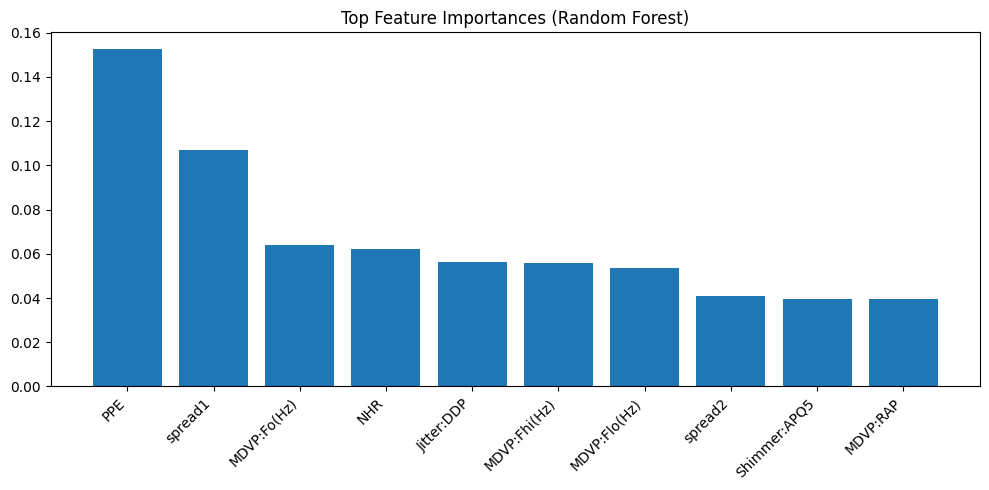

Recommended features for model training: ['PPE', 'spread1', 'MDVP:Fo(Hz)', 'NHR', 'Jitter:DDP', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'spread2', 'Shimmer:APQ5', 'MDVP:RAP']


In [48]:
# Feature Selection: Filter, Wrapper, and Embedded Methods
k = 10  # Number of top features to select
skb = SelectKBest(score_func=f_classif, k=k)
skb.fit(X_train, y_train)
skb_features = X_train.columns[skb.get_support()].tolist()
print('SelectKBest (ANOVA) top features:', skb_features)

lr = LogisticRegression(max_iter=1000, solver='liblinear')
rfe = RFE(lr, n_features_to_select=k)
rfe.fit(X_train, y_train)
rfe_features = X_train.columns[rfe.get_support()].tolist()
print('RFE top features:', rfe_features)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
importances = rf.feature_importances_
indices = importances.argsort()[::-1][:k]
rf_features = X_train.columns[indices].tolist()
print('Random Forest top features:', rf_features)

plt.figure(figsize=(10, 5))
plt.title('Top Feature Importances (Random Forest)')
plt.bar(range(k), importances[indices], align='center')
plt.xticks(range(k), rf_features, rotation=45, ha='right')
plt.tight_layout()
plt.show()

selected_features = rf_features
print('Recommended features for model training:', selected_features)

In [49]:
# Model Training - Part 1: All Features
print('--- Model Training: All Features ---')
lr_all = LogisticRegression(max_iter=1000)
rf_all = RandomForestClassifier()

lr_all.fit(X_train, y_train)
rf_all.fit(X_train, y_train)


--- Model Training: All Features ---


RandomForestClassifier()

In [50]:
# Model Evaluation - All Features
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Logistic Regression (All Features)
y_pred_lr_all = lr_all.predict(X_test)
print('Logistic Regression (All Features) Test Accuracy:', accuracy_score(y_test, y_pred_lr_all))
print('Precision:', precision_score(y_test, y_pred_lr_all))
print('Recall:', recall_score(y_test, y_pred_lr_all))
print('F1-score:', f1_score(y_test, y_pred_lr_all))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_lr_all))
print('Classification Report:\n', classification_report(y_test, y_pred_lr_all))

# Random Forest (All Features)
y_pred_rf_all = rf_all.predict(X_test)
print('Random Forest (All Features) Test Accuracy:', accuracy_score(y_test, y_pred_rf_all))
print('Precision:', precision_score(y_test, y_pred_rf_all))
print('Recall:', recall_score(y_test, y_pred_rf_all))
print('F1-score:', f1_score(y_test, y_pred_rf_all))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_rf_all))
print('Classification Report:\n', classification_report(y_test, y_pred_rf_all))

Logistic Regression (All Features) Test Accuracy: 0.9230769230769231
Precision: 0.9333333333333333
Recall: 0.9655172413793104
F1-score: 0.9491525423728814
Confusion Matrix:
 [[ 8  2]
 [ 1 28]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.93      0.97      0.95        29

    accuracy                           0.92        39
   macro avg       0.91      0.88      0.90        39
weighted avg       0.92      0.92      0.92        39

Random Forest (All Features) Test Accuracy: 0.9230769230769231
Precision: 0.9333333333333333
Recall: 0.9655172413793104
F1-score: 0.9491525423728814
Confusion Matrix:
 [[ 8  2]
 [ 1 28]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.93      0.97      0.95        29

    accuracy                           0.92        39
   macro avg       0.91    

In [51]:
# Model Training - Part 2: Selected Features
print('--- Model Training: Selected Features ---')
X_train_sel = X_train[selected_features]
X_test_sel = X_test[selected_features]

lr_sel = LogisticRegression(max_iter=1000)
rf_sel = RandomForestClassifier()

lr_sel.fit(X_train_sel, y_train)
rf_sel.fit(X_train_sel, y_train)


--- Model Training: Selected Features ---


RandomForestClassifier()

In [52]:
# Model Evaluation - Selected Features
# Logistic Regression (Selected Features)
y_pred_lr_sel = lr_sel.predict(X_test_sel)
print('Logistic Regression (Selected Features) Test Accuracy:', accuracy_score(y_test, y_pred_lr_sel))
print('Precision:', precision_score(y_test, y_pred_lr_sel))
print('Recall:', recall_score(y_test, y_pred_lr_sel))
print('F1-score:', f1_score(y_test, y_pred_lr_sel))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_lr_sel))
print('Classification Report:\n', classification_report(y_test, y_pred_lr_sel))

# Random Forest (Selected Features)
y_pred_rf_sel = rf_sel.predict(X_test_sel)
print('Random Forest (Selected Features) Test Accuracy:', accuracy_score(y_test, y_pred_rf_sel))
print('Precision:', precision_score(y_test, y_pred_rf_sel))
print('Recall:', recall_score(y_test, y_pred_rf_sel))
print('F1-score:', f1_score(y_test, y_pred_rf_sel))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_rf_sel))
print('Classification Report:\n', classification_report(y_test, y_pred_rf_sel))

Logistic Regression (Selected Features) Test Accuracy: 0.8717948717948718
Precision: 0.9
Recall: 0.9310344827586207
F1-score: 0.9152542372881356
Confusion Matrix:
 [[ 7  3]
 [ 2 27]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.70      0.74        10
           1       0.90      0.93      0.92        29

    accuracy                           0.87        39
   macro avg       0.84      0.82      0.83        39
weighted avg       0.87      0.87      0.87        39

Random Forest (Selected Features) Test Accuracy: 0.9230769230769231
Precision: 0.9333333333333333
Recall: 0.9655172413793104
F1-score: 0.9491525423728814
Confusion Matrix:
 [[ 8  2]
 [ 1 28]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.93      0.97      0.95        29

    accuracy                           0.92        39
   macro avg       0.91      0.8

## Model Optimization Impact

After feature selection, both models were retrained using only the top features. Compare the metrics above:
- If accuracy, precision, recall, or F1-score improved, the model benefited from removing less informative/noisy features.
- If metrics decreased, it may indicate that some removed features contained useful information.
- Feature selection can also help reduce overfitting and improve model interpretability.

In this case, review the printed metrics to see how optimization changed performance and explain the results accordingly.

In [53]:
# Save the best model (example: Random Forest with selected features)
import joblib
joblib.dump(rf_sel, 'best_model_rf_selected_features.joblib')
print('Best model saved as best_model_rf_selected_features.joblib')

# Save Random Forest (All Features)
joblib.dump(rf_all, 'model_rf_all_features.joblib')
print('Random Forest (All Features) model saved as model_rf_all_features.joblib')

# Save scaler
joblib.dump(scaler, 'scaler.joblib')
print('Scaler saved as scaler.joblib')

# Save selected features list
import pickle
with open('selected_features.pkl', 'wb') as f:
    pickle.dump(selected_features, f)
print('Selected features saved as selected_features.pkl')

Best model saved as best_model_rf_selected_features.joblib
Random Forest (All Features) model saved as model_rf_all_features.joblib
Scaler saved as scaler.joblib
Selected features saved as selected_features.pkl
